<a href="https://colab.research.google.com/github/Gideon-Weasley/Machine_Learning/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a model class that inherits nn.module
class myModel(nn.Module):
 #using the iris dataset -4 features for input layer -> hidden layer1 (h1) ->hidden layer h2->output (3 classes of iris flowers)
 def __init__(self,in_features=4,h1=8,h2=9, out_features=3):
  super().__init__()  # instantiate nn.Module
  self.fc1 =nn.Linear(in_features,h1) #linear transformation is applied the in_features=no. of features from input layer to hidden layer 1
  # linear transformation -> y = xW.T + b
  self.fc2=nn.Linear(h1,h2) # linear transformation from h1 to h2
  self.out=nn.Linear(h2,out_features)  #linear transformation from h2 to output layer

 def forward(self,x):
  x=F.relu(self.fc1(x))
  x=F.relu(self.fc2(x))
  x=self.out(x)

  return x


In [ ]:
#pick a random seed for rantorch.domization
torch.manual_seed(32)
#Create an instance of  the model
model=myModel()
print(model)

myModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# for charts

In [ ]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)
my_df  #dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df['species']=my_df['species'].replace('setosa',0.0)  #replacing the name with a number -for machine learning - data as number
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df.head(10)

<ipython-input-8-866310319586>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
# Train Test split set X,y
X=my_df.drop('species',axis=1)  # dropping the last column - which is the output
y=my_df['species']

#convert these into numpy arrays
X=X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split ratio= 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
#converting it all to tensor for putorch
# FloatTensor bcz all the feature values are float if int - Tensor should do
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
# y values are converted to long as we dont necessarily need the output as decimal - we only care if they are 0/1/2
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
#set the criterion of model to measure the error , how far off the predictions ar from the data
criterion=nn.CrossEntropyLoss()
#sets the loss function (or criterion) for your model. This is how the model measures how far off its predictions are from the actual labels, during training.
#crosss entropy loss is generally applied for multi class classification problems

#chose optimizer, and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  #here we can add additional parameters like weight decay

In [ ]:
#Train our model
epoch = 300
losses=[] # for entering losses - to know if our model is learning
for i in range(epoch):
  y_pred = model.forward(X_train) #get predicted results
  loss= criterion(y_pred,y_train) #measure the oss against our original value
  losses.append(loss.detach().numpy())

  if i%10 ==0:
    print(f'epoch: {i} and loss: {loss}')
  #do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 and loss: 1.169895887374878
epoch: 10 and loss: 1.1307536363601685
epoch: 20 and loss: 1.0943182706832886
epoch: 30 and loss: 1.0664092302322388
epoch: 40 and loss: 1.0409716367721558
epoch: 50 and loss: 1.0179129838943481
epoch: 60 and loss: 0.996281623840332
epoch: 70 and loss: 0.9745318293571472
epoch: 80 and loss: 0.9534372091293335
epoch: 90 and loss: 0.9317707419395447
epoch: 100 and loss: 0.9081366658210754
epoch: 110 and loss: 0.8845569491386414
epoch: 120 and loss: 0.8616767525672913
epoch: 130 and loss: 0.8393822908401489
epoch: 140 and loss: 0.8181856870651245
epoch: 150 and loss: 0.7983383536338806
epoch: 160 and loss: 0.7796430587768555
epoch: 170 and loss: 0.762294590473175
epoch: 180 and loss: 0.7462320923805237
epoch: 190 and loss: 0.7309457659721375
epoch: 200 and loss: 0.7156355977058411
epoch: 210 and loss: 0.6866455078125
epoch: 220 and loss: 0.6442301273345947
epoch: 230 and loss: 0.5888983011245728
epoch: 240 and loss: 0.5479819774627686
epoch: 250 and lo

Text(0.5, 0, 'Epoch')

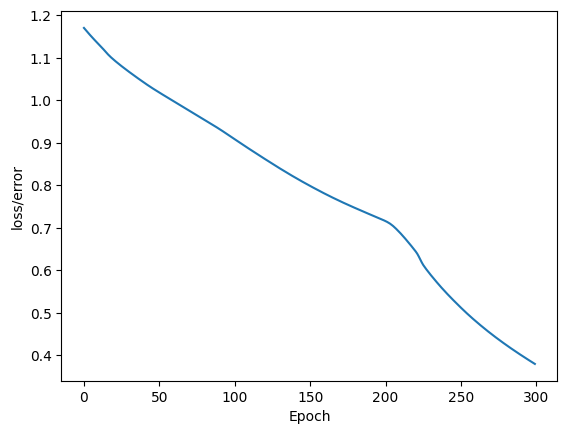

In [ ]:
#Graph it out
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
#Evaluating on test data set
with torch.no_grad(): # turn off back propogation
 y_eval = model.forward(X_test)  #X_test are features from test set and y_eval will be the results
 loss=criterion(y_eval,y_test)
loss

tensor(0.3509)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)

#will tell us what iris class our network think it is
    print(f'{i+1} {str(y_val)} \t {y_test[i]}')   #  will print the tensor values for the prediction
    #example tensor([-4.4297,  1.4179,  8.6359]) -> not only this but for entire test set
    #in the above example it takes the highest number as the prediction
    # that is third type of flower is chosen as prediction ie. virginica  ( we chose number 2 for virginica)
    #{y_test[i+1]}  will print the actual op


    #checking number of correct arguments
    if y_val.argmax().item() == y_test[i] :
      correct+=1
print(f'We got {correct} correct!')


1 tensor([-1.5472,  0.9553,  0.6299]) 	 1
2 tensor([ 1.5889, -0.7747, -2.2709]) 	 0
3 tensor([ 1.4025, -0.6314, -2.0627]) 	 0
4 tensor([-1.5571,  0.9787,  0.5835]) 	 1
5 tensor([-2.6082,  1.0490,  1.5643]) 	 2
6 tensor([-2.7694,  1.1652,  1.5359]) 	 2
7 tensor([ 1.2449, -0.4693, -1.8895]) 	 0
8 tensor([ 1.4205, -0.6544, -2.0847]) 	 0
9 tensor([-1.2814,  0.9221,  0.3585]) 	 1
10 tensor([ 1.5647, -0.7646, -2.2321]) 	 0
11 tensor([-2.0098,  1.1085,  0.9520]) 	 1
12 tensor([-2.7568,  0.9888,  1.7055]) 	 2
13 tensor([-1.3251,  0.9335,  0.5057]) 	 1
14 tensor([-1.1112,  0.9761,  0.2108]) 	 1
15 tensor([-2.6128,  1.0324,  1.5547]) 	 2
16 tensor([-2.8730,  0.9705,  1.8826]) 	 2
17 tensor([-1.5278,  0.9135,  0.6268]) 	 1
18 tensor([-2.4986,  1.0375,  1.4688]) 	 2
19 tensor([-1.2597,  0.9669,  0.3782]) 	 1
20 tensor([ 1.6313, -0.7924, -2.3391]) 	 0
21 tensor([ 1.5276, -0.7210, -2.2196]) 	 0
22 tensor([-3.3326,  1.1816,  2.1213]) 	 2
23 tensor([-2.0812,  0.9632,  1.1084]) 	 2
24 tensor([ 1.3978, 

In [ ]:
# Giving a new data to the model and then predicting
new_iris = torch.tensor([5.9,3.0,5.1,1.0])
with torch.no_grad():
  op=model(new_iris)
op=op.argmax().item()
res=['setosa','versicolor','virginica'][op]
print(f'The iris is {res}')

The iris is versicolor


In [ ]:
#saving the model
torch.save(model.state_dict(),'iris_classification_model')
#here the model weights are stored in a dictionary format

In [ ]:
#loading the model
new_model=myModel()
new_model.load_state_dict(torch.load('iris_classification_model'))
#here when we are to load the model we are actually loading the weights - so the new model must have same architecture
#we do not load the whole model code - just the weights

<All keys matched successfully>

In [ ]:
new_model.eval()
#making sure the compiler knows that model is in evaluation mode - not training mode

myModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)